# Finding the Lyaponov Orbits
## Given:
The Earth-Moon system at the $L_1$

## Find:
a) Compute atleast 20 different orbits. Whats is a good stratergy $\dot{y}_0$. Update $\dot{y}_0$ as a function of $x_0$. Can you continue this stratergy.

b) Update period and IC plots. How does it change?

c) Eigenvalues of STM. Three reciprocal pairs? What is the reciprocal of complex eigenvalues?

In [37]:
# Import Functions and basic infor
import sys
sys.path.append('../')
from Functions.Universe import Solar_3 as SS3
from Functions import Keplarian_fnc as kp
from Functions import Poincare_fnc as pn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from datetime import timedelta
import tqdm as tq

In [38]:
system = "Earth-Moon"
gamma1, L1 = pn.L1_Newton(SS3.loc[system,'miu'],  0.01)

target = {'x_dot_f': 0, 'y_f':0}
changeable = ('y_dot_0')

### Part a)

100%|██████████| 20/20 [02:54<00:00,  8.74s/it]


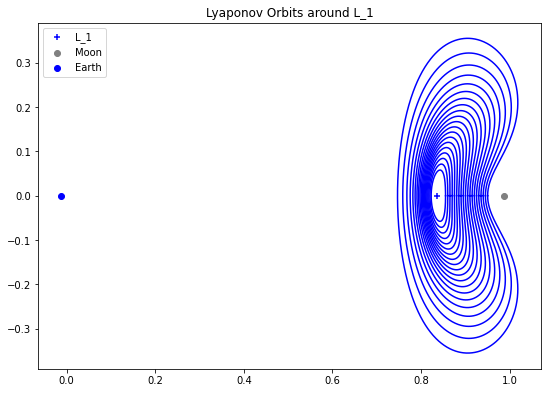

In [55]:
n = 20

x_0_vec = np.array([0.847, 0.8505])
y_dot_0_vec = np.array([-.08, -0.103])
Per_vec = np.array([3.1835, 3.180])
J_c_vec = np.zeros((n,))
eig_val_vec = np.zeros((6,n), dtype=complex)

step = 0.005

fig, axs = plt.subplots(figsize= (9,9))

for i in tq.tqdm(range(n)):
    # Guesser
    x0 = x_0_vec[-1] + step
    
    grad = (y_dot_0_vec[-1] - y_dot_0_vec[-2])/(x_0_vec[-1] - x_0_vec[-2])
    intercept = y_dot_0_vec[-1] - grad*x_0_vec[-1]
    y_dot_0 = x0 *grad + intercept
    IC = np.array([x0, 0, 0, 0, y_dot_0, 0])
    
    grad = (Per_vec[-1] - Per_vec[-2])/(x_0_vec[-1] - x_0_vec[-2])
    intercept = Per_vec[-1] - grad*x_0_vec[-1]
    tf = x0 *grad + intercept
    t_span = np.array([0, tf/2])
    
    # Find the new orbit
    # fig, axs = plt.subplots(figsize= (7,7))
    IC, final_per, tf_per = pn.target(IC[:6], SS3.loc[system, 'miu'], t_span=t_span, target=target, tol=10**-10, 
                                      change_tf=True, changeable=changeable, attempts=10)
    
    t_span = [0, 2*tf_per] 
    # Plot the new orbit
    traj_perd = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu'], phi=True), t_span , IC, method='RK45',
                      rtol=10**-12, atol=10**-16)

    IC = IC[:6]
    
    # Eigenvalues
    eig_val, _ = np.linalg.eig(traj_perd.y[6:,-1].reshape(6,6))
    eig_val_vec[:,i] = eig_val
    
    # Log some values
    y_dot_0_vec = np.append(y_dot_0_vec, IC[4])
    x_0_vec = np.append(x_0_vec, IC[0])
    Per_vec = np.append(Per_vec, t_span[-1])
    J_c_vec[i] = pn.Jacobi_const(*IC[:3], v=np.linalg.norm(IC[3:6]), miu=SS3.loc[system,'miu'])
    
    axs.plot(traj_perd.y[0,:], traj_perd.y[1,:], color = 'blue')

axs.scatter(L1,0, marker = '+', color='blue', label='L_1')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.scatter(-SS3.loc[system, 'miu'],0, marker='o', color='Blue', label='Earth')
axs.legend()
axs.set_aspect('equal', 'box')
axs.set_title('Lyaponov Orbits around L_1')
axs.legend()

### Part b)

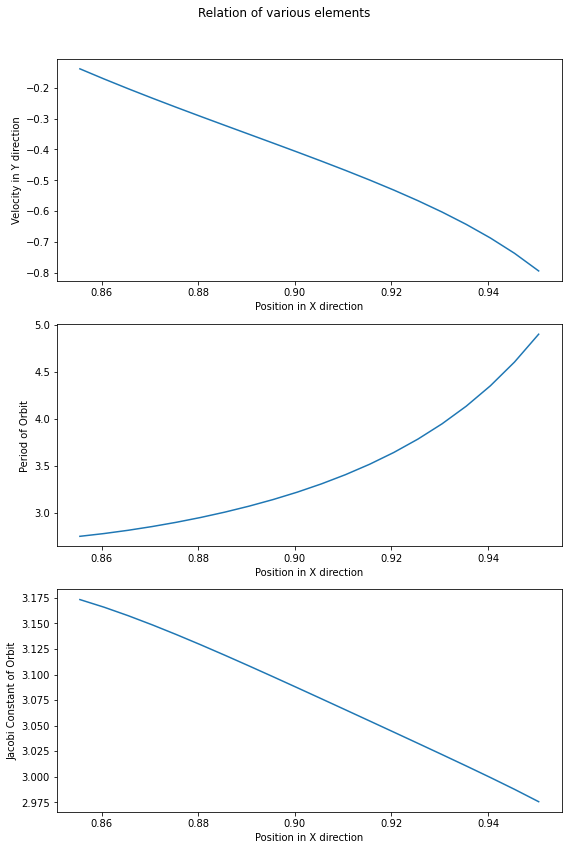

In [47]:
fig, axs = plt.subplots(ncols=1, nrows=3, figsize= (8,12))
ax = axs.ravel()

ax[0].plot(x_0_vec[2:], y_dot_0_vec[2:])
ax[0].set_xlabel('Position in X direction')
ax[0].set_ylabel('Velocity in Y direction')


ax[1].plot(x_0_vec[2:], Per_vec[2:])
ax[1].set_xlabel('Position in X direction')
ax[1].set_ylabel('Period of Orbit')

ax[2].plot(x_0_vec[2:], J_c_vec)
ax[2].set_xlabel('Position in X direction')
ax[2].set_ylabel('Jacobi Constant of Orbit')

fig.suptitle('Relation of various elements')
fig.tight_layout()
fig.subplots_adjust(top=0.92)


### Part c)

In [58]:
pd.DataFrame(np.round(eig_val_vec,5), columns=x_0_vec[2:])

,0.8555,0.8605,0.8655,0.8705,0.8755,0.8805,0.8855,0.8905,0.8955,0.9005,0.9055,0.9105,0.9155,0.9205,0.9255,0.9305,0.9355,0.9405,0.9455,0.9505
0,2340.57358+0.00000j,2185.28586+0.00000j,2020.60852+0.00000j,1852.62935+0.00000j,1685.91596+0.00000j,1523.8128+0.0000j,1368.68816+0.00000j,1222.13744+0.00000j,1085.14931+0.00000j,958.24117+0.00000j,841.56932+0.00000j,735.01867+0.00000j,638.27616+0.00000j,550.89161+0.00000j,472.32972+0.00000j,402.01735+0.00000j,339.3907+0.0000j,283.94925+0.00000j,235.32386+0.00000j,193.37176+0.00000j
1,0.000430+0.000000j,0.000460+0.000000j,0.000490+0.000000j,0.000540+0.000000j,0.000590+0.000000j,0.00066+0.00000j,0.000730+0.000000j,0.000820+0.000000j,0.000920+0.000000j,1.000010+0.000000j,1.000000+0.000000j,0.001360+0.000000j,0.001570+0.000000j,0.001820+0.000000j,0.002120+0.000000j,1.000000+0.000370j,0.00295+0.00000j,1.001200+0.000000j,1.000000+0.000100j,1.001370+0.000000j
2,1.000000+0.000000j,1.000000+0.000000j,0.999990+0.000000j,1.000010+0.000000j,1.000000+0.000000j,0.99999+0.00000j,1.000000+0.000000j,1.000000+0.000010j,1.000040+0.000000j,0.999990+0.000000j,1.000000+0.000000j,1.000010+0.000000j,1.000020+0.000000j,1.000000+0.000010j,1.000000+0.000100j,1.000000-0.000370j,1.00000+0.00112j,0.998800+0.000000j,1.000000-0.000100j,0.998630+0.000000j
3,1.000000+0.000000j,1.000000-0.000000j,1.000010+0.000000j,0.999990+0.000000j,1.000000+0.000000j,1.00001+0.00000j,1.000000+0.000000j,1.000000-0.000010j,0.999960+0.000000j,0.001040+0.000000j,0.001190+0.000000j,0.999990+0.000000j,0.999980+0.000000j,1.000000-0.000010j,1.000000-0.000100j,0.002490+0.000000j,1.00000-0.00112j,0.003520+0.000000j,0.004250+0.000000j,0.005170+0.000000j
4,1.048010+0.000000j,0.869700+0.000000j,0.820200+0.000000j,1.280620+0.000000j,0.747440+0.000000j,1.39217+0.00000j,1.443460+0.000000j,1.491150+0.000000j,1.533910+0.000000j,0.637140+0.000000j,0.627120+0.000000j,1.603770+0.000000j,1.588590+0.000000j,1.534570+0.000000j,1.411960+0.000000j,1.056480+0.000000j,0.90484+0.42575j,0.751820+0.659370j,0.516350+0.856380j,0.162970+0.986630j
5,0.954190+0.000000j,1.149830+0.000000j,1.219220+0.000000j,0.780870+0.000000j,1.337900+0.000000j,0.71831+0.00000j,0.692780+0.000000j,0.670620+0.000000j,0.651930+0.000000j,1.569520+0.000000j,1.594580+0.000000j,0.623530+0.000000j,0.629490+0.000000j,0.651650+0.000000j,0.708240+0.000000j,0.946540+0.000000j,0.90484-0.42575j,0.751820-0.659370j,0.516350-0.856380j,0.162970-0.986630j
